<a href="https://colab.research.google.com/github/VaggelisApostolou/auth-dws-ml-2025/blob/main/ML_Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import export_text

# **Μέρος 1**

## *Ερώτημα 1*

In [ ]:
df1 = pd.read_csv('wine-missing.csv')
print(df1.describe)

<bound method NDFrame.describe of          type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       white            7.0             0.270         0.36            20.7   
1     unknown            6.3             0.300         0.34             1.6   
2       white            8.1             0.280         0.40             6.9   
3     unknown            7.2             0.230         0.32             8.5   
4     unknown            7.2             0.230         0.32             8.5   
...       ...            ...               ...          ...             ...   
6492      red            6.2             0.600         0.08             2.0   
6493      red            5.9             0.550         0.10             2.2   
6494  unknown            6.3             0.510         0.13             2.3   
6495      red            5.9             0.645         0.12             2.0   
6496      red            6.0             0.310         0.47             3.6   

      chlorides  

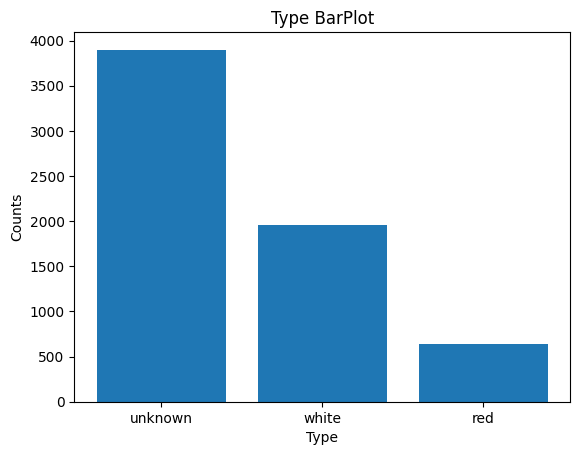

In [ ]:
type_counts = df1['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.title('Type BarPlot')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.xticks(type_counts.index)
plt.show()

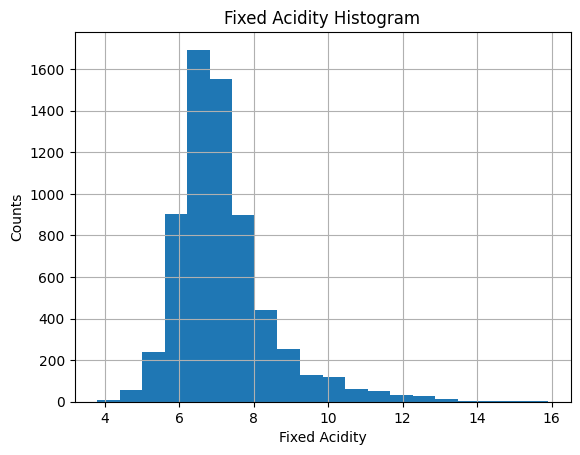

In [ ]:
df1['fixed acidity'].hist(bins=20)
plt.title('Fixed Acidity Histogram')
plt.xlabel('Fixed Acidity')
plt.ylabel('Counts')
plt.show()

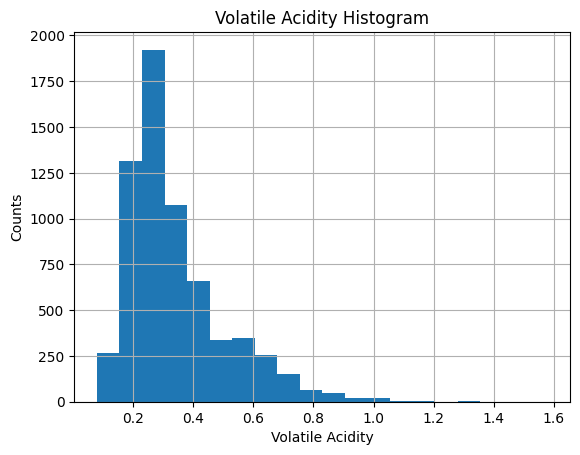

In [ ]:
df1['volatile acidity'].hist(bins=20)
plt.title('Volatile Acidity Histogram')
plt.xlabel('Volatile Acidity')
plt.ylabel('Counts')
plt.show()

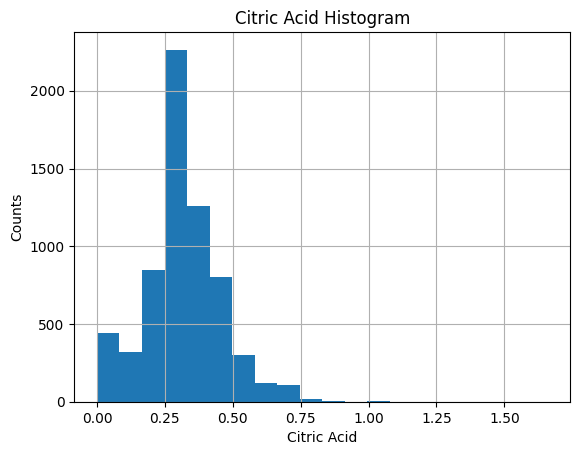

In [ ]:
df1['citric acid'].hist(bins=20)
plt.title('Citric Acid Histogram')
plt.xlabel('Citric Acid')
plt.ylabel('Counts')
plt.show()

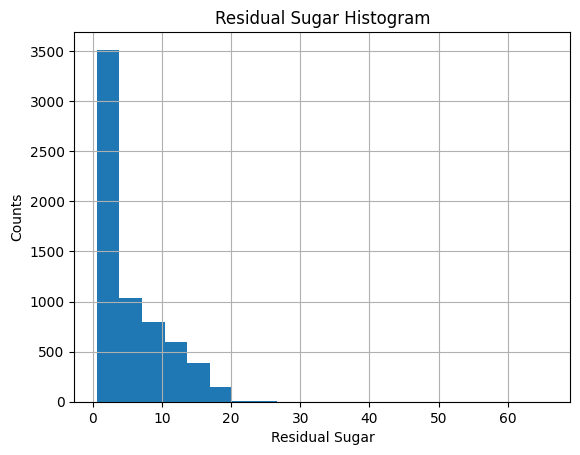

In [ ]:
df1['residual sugar'].hist(bins=20)
plt.title('Residual Sugar Histogram')
plt.xlabel('Residual Sugar')
plt.ylabel('Counts')
plt.show()

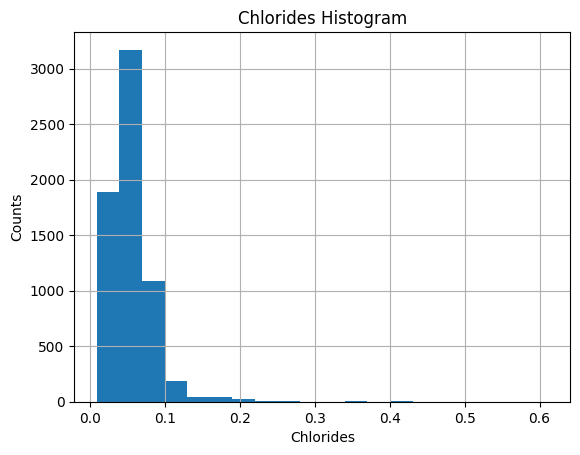

In [ ]:
df1['chlorides'].hist(bins=20)
plt.title('Chlorides Histogram')
plt.xlabel('Chlorides')
plt.ylabel('Counts')
plt.show()

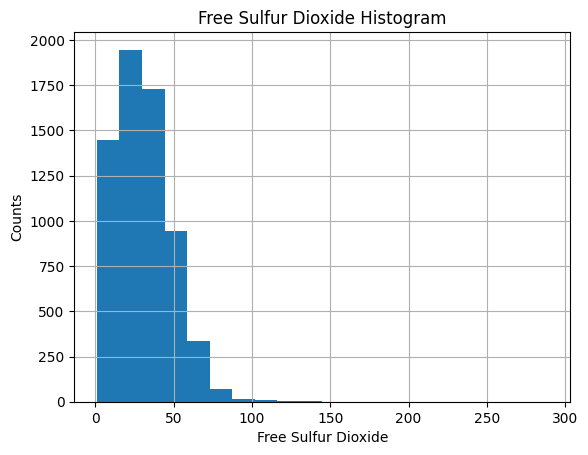

In [ ]:
df1['free sulfur dioxide'].hist(bins=20)
plt.title('Free Sulfur Dioxide Histogram')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Counts')
plt.show()

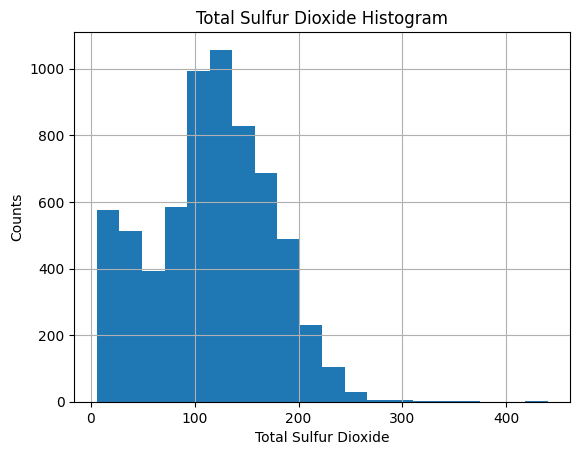

In [ ]:
df1['total sulfur dioxide'].hist(bins=20)
plt.title('Total Sulfur Dioxide Histogram')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Counts')
plt.show()

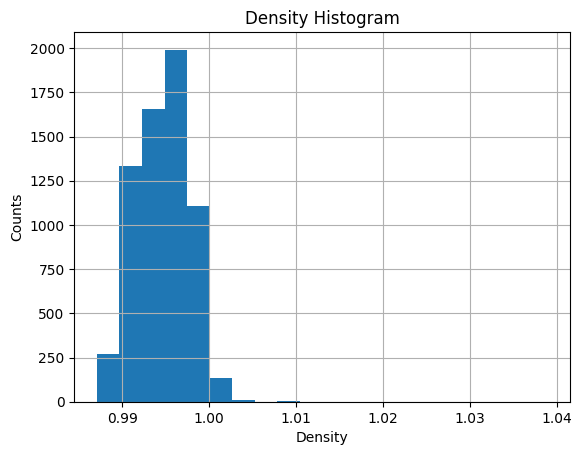

In [ ]:
df1['density'].hist(bins=20)
plt.title('Density Histogram')
plt.xlabel('Density')
plt.ylabel('Counts')
plt.show()

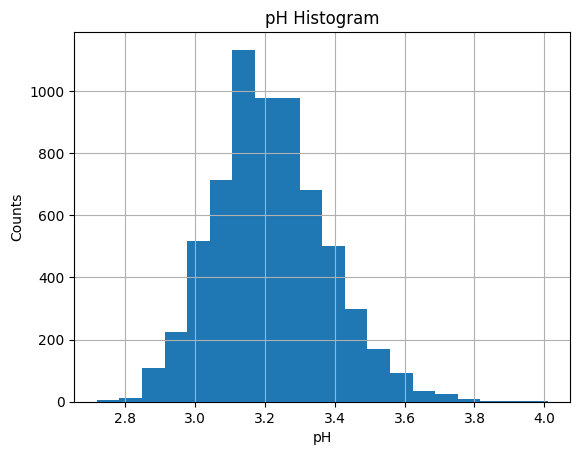

In [ ]:
df1['pH'].hist(bins=20)
plt.title('pH Histogram')
plt.xlabel('pH')
plt.ylabel('Counts')
plt.show()

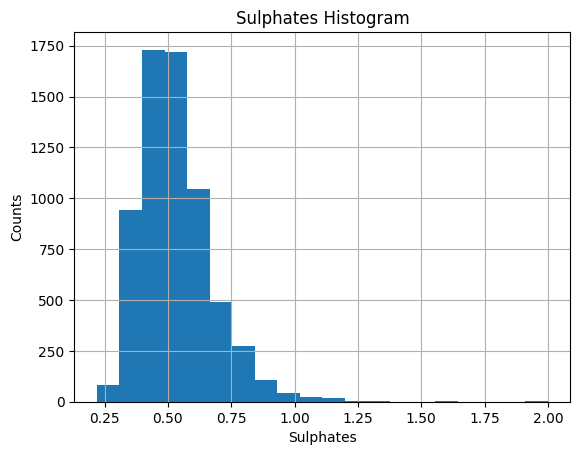

In [ ]:
df1['sulphates'].hist(bins=20)
plt.title('Sulphates Histogram')
plt.xlabel('Sulphates')
plt.ylabel('Counts')
plt.show()

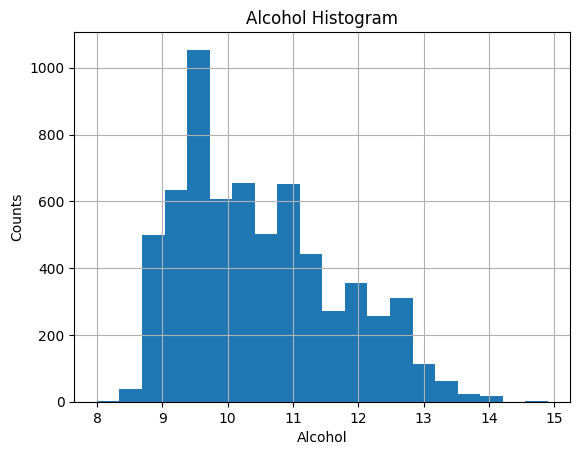

In [ ]:
df1['alcohol'].hist(bins=20)
plt.title('Alcohol Histogram')
plt.xlabel('Alcohol')
plt.ylabel('Counts')
plt.show()

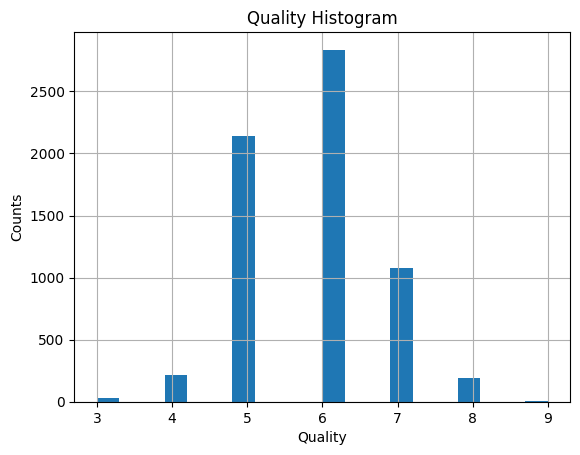

In [ ]:
df1['quality'].hist(bins=20)
plt.title('Quality Histogram')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.show()

## *Ερώτημα 2*

In [ ]:
df1['type'] = df1['type'].replace({
    'white': 0,
    'red': 1,
    'unknown': 2
})

/tmp/ipython-input-2966578654.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['type'] = df1['type'].replace({


In [ ]:
print(df1.type)

0       0
1       2
2       0
3       2
4       2
       ..
6492    1
6493    1
6494    2
6495    1
6496    1
Name: type, Length: 6497, dtype: int64


In [ ]:
X = df1.drop(columns=['type']).to_numpy()
y = df1['type'].to_numpy()

## *Ερώτημα 3*

In [ ]:
df_known = df1[df1['type'] != 2]
df_unknown = df1[df1['type'] == 2]

In [ ]:
x_known = df_known.drop(columns=['type']).to_numpy()
y_known = df_known['type'].to_numpy()

In [ ]:
x_unknown = df_unknown.drop(columns=['type']).to_numpy()

## *Ερώτημα 4*

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.30,
    random_state=42,
    stratify=y_known
)

## *Ερώτημα 5*

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

In [ ]:
print("Train Set:")
print("Accuracy:", acc_train)
print("Precision:", prec_train)
print("Recall:", rec_train)
print("F1:", f1_train)

print("\nTest Set:")
print("Accuracy:", acc_test)
print("Precision:", prec_test)
print("Recall:", rec_test)
print("F1:", f1_test)

Train Set:
Accuracy: 0.999450247388675
Precision: 0.9977728285077951
Recall: 1.0
F1: 0.9988851727982163

Test Set:
Accuracy: 0.9987179487179487
Precision: 0.9948186528497409
Recall: 1.0
F1: 0.9974025974025974


Η μετρική F1 είναι πιο αντιπροσωπευτική, καθώς το dataset δεν είναι ισορροπημένο, με τα whites να είναι περισσότερα από τα reds.

## *Ερώτημα 6*

In [ ]:
model_balanced = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

model_balanced.fit(x_train, y_train)

y_train_pred_bal = model_balanced.predict(x_train)
y_test_pred_bal = model_balanced.predict(x_test)

Σύμφωνα με το documentation της RandomForestClassifier, η παράμετρος class_weight='balanced' υπολογίζει αυτόματα τα βάρη αντιστρόφως ανάλογα με τη συχνότητα που εμφανίζεται η κάθε κλάση. Δηλαδή, αν μια κλάση εμφανίζεται σπανιότερα, παίρνει μεγαλύτερο βάρος. Αντίθετα, αν μια κλάση εμφανίζεται πιο συχνά, παίρνει μικρότερο βάρος. Επομένως, είναι χρήσιμη παράμετρος για ένα dataset όπως το συγκεκριμένο που δεν είναι ισορροπημένο.

In [ ]:
acc_train = accuracy_score(y_train, y_train_pred_bal)
prec_train = precision_score(y_train, y_train_pred_bal)
rec_train = recall_score(y_train, y_train_pred_bal)
f1_train = f1_score(y_train, y_train_pred_bal)

acc_test = accuracy_score(y_test, y_test_pred_bal)
prec_test = precision_score(y_test, y_test_pred_bal)
rec_test = recall_score(y_test, y_test_pred_bal)
f1_test = f1_score(y_test, y_test_pred_bal)

In [ ]:
print("Train Set:")
print("Accuracy:", acc_train)
print("Precision:", prec_train)
print("Recall:", rec_train)
print("F1:", f1_train)

print("\nTest Set:")
print("Accuracy:", acc_test)
print("Precision:", prec_test)
print("Recall:", rec_test)
print("F1:", f1_test)

Train Set:
Accuracy: 0.999450247388675
Precision: 0.9977728285077951
Recall: 1.0
F1: 0.9988851727982163

Test Set:
Accuracy: 0.9948717948717949
Precision: 0.9947368421052631
Recall: 0.984375
F1: 0.9895287958115183


## *Ερώτημα 7*

In [ ]:
y_unknown_proba = model_balanced.predict_proba(x_unknown)

## *Ερώτημα 8*

In [ ]:
y_unknown_pred = np.array([None]*len(x_unknown))
prob_red = y_unknown_proba[:, 1]
y_unknown_pred[prob_red > 0.65] = 'red'
y_unknown_pred[prob_red < 0.35] = 'white'

## *Ερώτημα 9*

In [ ]:
labeled_indices = np.where(y_unknown_pred != None)[0]
x_new = x_unknown[labeled_indices]
y_new = y_unknown_pred[labeled_indices]
y_new_num = np.array([0 if label=='white' else 1 for label in y_new])

In [ ]:
x_train_aug = np.vstack([x_train, x_new])
y_train_aug = np.hstack([y_train, y_new_num])

In [ ]:
model_final = RandomForestClassifier(random_state=42, class_weight='balanced')
model_final.fit(x_train_aug, y_train_aug)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_train_pred_final = model_final.predict(x_train)
y_test_pred_final = model_final.predict(x_test)
acc_train_final = accuracy_score(y_train, y_train_pred_final)
acc_test_final = accuracy_score(y_test, y_test_pred_final)

print("Final Train Accuracy:", acc_train_final)
print("Final Test Accuracy:", acc_test_final)

Final Train Accuracy: 0.999450247388675
Final Test Accuracy: 0.9948717948717949


## *Ερώτημα 10*

In [ ]:
threshold_high = 0.65
threshold_low = 0.35

x_train_aug_loop = x_train.copy()
y_train_aug_loop = y_train.copy()
x_unknown_loop = x_unknown.copy()

while True:
    y_unknown_proba_loop = model_final.predict_proba(x_unknown_loop)
    prob_red = y_unknown_proba_loop[:, 1]

    red_idx = np.where(prob_red > threshold_high)[0]
    white_idx = np.where(prob_red < threshold_low)[0]
    selected_idx = np.concatenate([red_idx, white_idx])

    if len(selected_idx) == 0:
        break

    labels = np.array(['red']*len(red_idx) + ['white']*len(white_idx))
    labels_num = np.array([1 if l=='red' else 0 for l in labels])

    x_train_aug_loop = np.vstack([x_train_aug_loop, x_unknown_loop[selected_idx]])
    y_train_aug_loop = np.hstack([y_train_aug_loop, labels_num])

    mask = np.ones(len(x_unknown_loop), dtype=bool)
    mask[selected_idx] = False
    x_unknown_loop = x_unknown_loop[mask]

    model_final = RandomForestClassifier(random_state=42, class_weight='balanced')
    model_final.fit(x_train_aug_loop, y_train_aug_loop)

# **Μέρος 2**

## *Ερώτημα 1*

In [ ]:
df2 = pd.read_csv('wine-full.csv')
print(df2.describe)

<bound method NDFrame.describe of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  tot

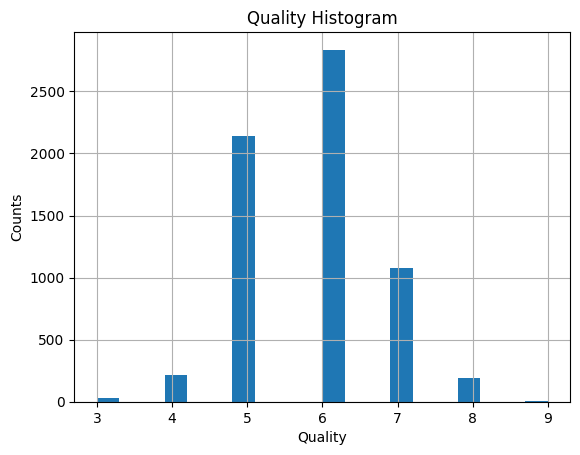

In [ ]:
df2['quality'].hist(bins=20)
plt.title('Quality Histogram')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.show()

Θεωρώ πως το σκορ (quality) δεν είναι ισορροπημένο (balanced), καθώς όπως φαίνεται και στο plot για σκορ 6 εμφανίζονται περισσότερες από 2500 εγγραφές, για σκορ 5 λίγο περισσότερες από 2000, για σκορ 7 λίγο περισσότερες από 1000, ενώ για τα σκορ 3, 4, 8 και 9 οι εγγραφές είναι μηδαμινές σε σχέση με τις υπόλοιπες τρεις κλάσεις.

## *Ερώτημα 2*

In [ ]:
print(df2.groupby('type')['quality'].mean())

type
red      5.636023
white    5.877909
Name: quality, dtype: float64


In [ ]:
print(df2.groupby('type')['quality'].describe())

        count      mean       std  min  25%  50%  75%  max
type                                                      
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0


Σύμφωνα με τα δεδομένα του dataset, ποιοτικά καλύτερο είναι το λευκό κρασί καθώς ο mean του είναι λίγο μεγαλύτερος από εκείνον του κόκκινου κρασιού.

## *Ερώτημα 3*

In [ ]:
def sweetness_level(rs):
    if rs < 4:
        return 'dry'
    elif rs < 12:
        return 'off-dry'
    elif rs < 45:
        return 'semi-sweet'
    else:
        return 'sweet'

df2['sweetness'] = df2['residual sugar'].apply(sweetness_level)

In [ ]:
df2.groupby('sweetness')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
sweetness,,,,,,,,
dry,3539.0,5.818593,0.883799,3.0,5.0,6.0,6.0,9.0
off-dry,2106.0,5.842355,0.880418,3.0,5.0,6.0,6.0,9.0
semi-sweet,849.0,5.756184,0.807198,3.0,5.0,6.0,6.0,8.0
sweet,3.0,6.333333,0.577350,6.0,6.0,6.0,6.5,7.0


Σύμφωνα με το dataset και χωρίζοντας τα κρασιά σε sweetness types, με βάση τα σάκχαρά τους, φαίνεται πως το γλυκό κρασί υπερέχει σε ποιότητα από τα υπόλοιπα.

In [ ]:
df2 = df2.drop(columns=['sweetness'])
print(df2.describe)

<bound method NDFrame.describe of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  tot

## *Ερώτημα 4*

In [ ]:
X = df2.drop(columns=["type", "quality"] ).values
y = df2["quality"].values
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=0
)


## *Ερώτημα 5*

In [ ]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)

MAE: 0.43846153846153846


## *Ερώτημα 6*

In [ ]:
mae_scores = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.10, random_state=seed
    )

    model = DecisionTreeRegressor(random_state=seed)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)

print("MAE scores:", mae_scores)
print("Mean MAE:", mae_mean)
print("Std MAE:", mae_std)

MAE scores: [0.43846153846153846, 0.5184615384615384, 0.4369230769230769, 0.48615384615384616, 0.5, 0.44769230769230767, 0.4723076923076923, 0.44, 0.4246153846153846, 0.4815384615384615]
Mean MAE: 0.46461538461538454
Std MAE: 0.02983980900045159


Με βάση τα αποτελέσματα, παρατηρούμε ότι η τυπική απόκλιση του MAE είναι περίπου 2,5% και το μέσο MAE περίπου 47%. Επομένως, το μοντέλο είναι σχετικά σταθερό και αξιόπιστο, λόγω της μικρής τυπικής απόκλισης, αλλά το μέσο σφάλμα του παραμένει σε υψηλά επίπεδα.

## *Ερώτημα 7*

In [ ]:
x_train_full, x_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.10, random_state=0
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.20, random_state=0
)

param_grid = [
    {"max_depth": d, "min_samples_split": s, "min_samples_leaf": l}
    for d in [3, 5, 7, None]
    for s in [2, 5, 10]
    for l in [1, 2]
]


param_grid = param_grid[:15]

results = []

for i, params in enumerate(param_grid):
    model = DecisionTreeRegressor(
        random_state=0,
        **params
    )

    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    mae_train = mean_absolute_error(y_train, train_pred)

    val_pred = model.predict(x_val)
    mae_val = mean_absolute_error(y_val, val_pred)

    results.append({
        "combination": i+1,
        "params": params,
        "train_MAE": mae_train,
        "val_MAE": mae_val
    })

df_results = pd.DataFrame(results)
print(df_results)

    combination                                             params  train_MAE  \
0             1  {'max_depth': 3, 'min_samples_split': 2, 'min_...   0.583542   
1             2  {'max_depth': 3, 'min_samples_split': 2, 'min_...   0.583542   
2             3  {'max_depth': 3, 'min_samples_split': 5, 'min_...   0.583542   
3             4  {'max_depth': 3, 'min_samples_split': 5, 'min_...   0.583542   
4             5  {'max_depth': 3, 'min_samples_split': 10, 'min...   0.583542   
5             6  {'max_depth': 3, 'min_samples_split': 10, 'min...   0.583542   
6             7  {'max_depth': 5, 'min_samples_split': 2, 'min_...   0.542107   
7             8  {'max_depth': 5, 'min_samples_split': 2, 'min_...   0.542450   
8             9  {'max_depth': 5, 'min_samples_split': 5, 'min_...   0.542107   
9            10  {'max_depth': 5, 'min_samples_split': 5, 'min_...   0.542450   
10           11  {'max_depth': 5, 'min_samples_split': 10, 'min...   0.542107   
11           12  {'max_depth

## *Ερώτημα 8*

Για την επιλογή των υπερπαραμέτρων, πιο αξιόπιστο θεωρείται το validation set, καθώς αποτελείται από δεδομένα που δεν χρησιμοποιήθηκαν στην εκπαίδευση.

## *Ερώτημα 9*

In [ ]:
model = DecisionTreeRegressor(random_state=0)

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

grid.fit(x_train_full, y_train_full)

print("Best parameters:", grid.best_params_)
print("Best CV MAE:", -grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV MAE: 0.474608652382625


## *Ερώτημα 10*

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Test MAE: 0.43846153846153846


Από τις μεθοδολογίες που ακολουθήθηκαν, περισσότερο αξιόπιστη είναι αυτή του ερωτήματος 9, καθώς σημείωσε το μικρότερο MAE από τις υπόλοιπες.

## *Ερώτημα 11*

[[ 7.4   0.7   0.   ...  3.51  0.56  9.4 ]
 [ 7.2   0.37  0.4  ...  3.1   0.51  9.8 ]
 [ 7.2   0.32  0.36 ...  3.1   0.71 12.3 ]
 ...
 [ 7.9   0.33  0.28 ...  3.15  0.38  8.8 ]
 [ 8.9   0.26  0.33 ...  3.13  0.46 10.8 ]
 [ 7.9   0.51  0.34 ...  3.09  0.51 10.  ]]
Best parameters: {'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV MAE: 0.56711356247465
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


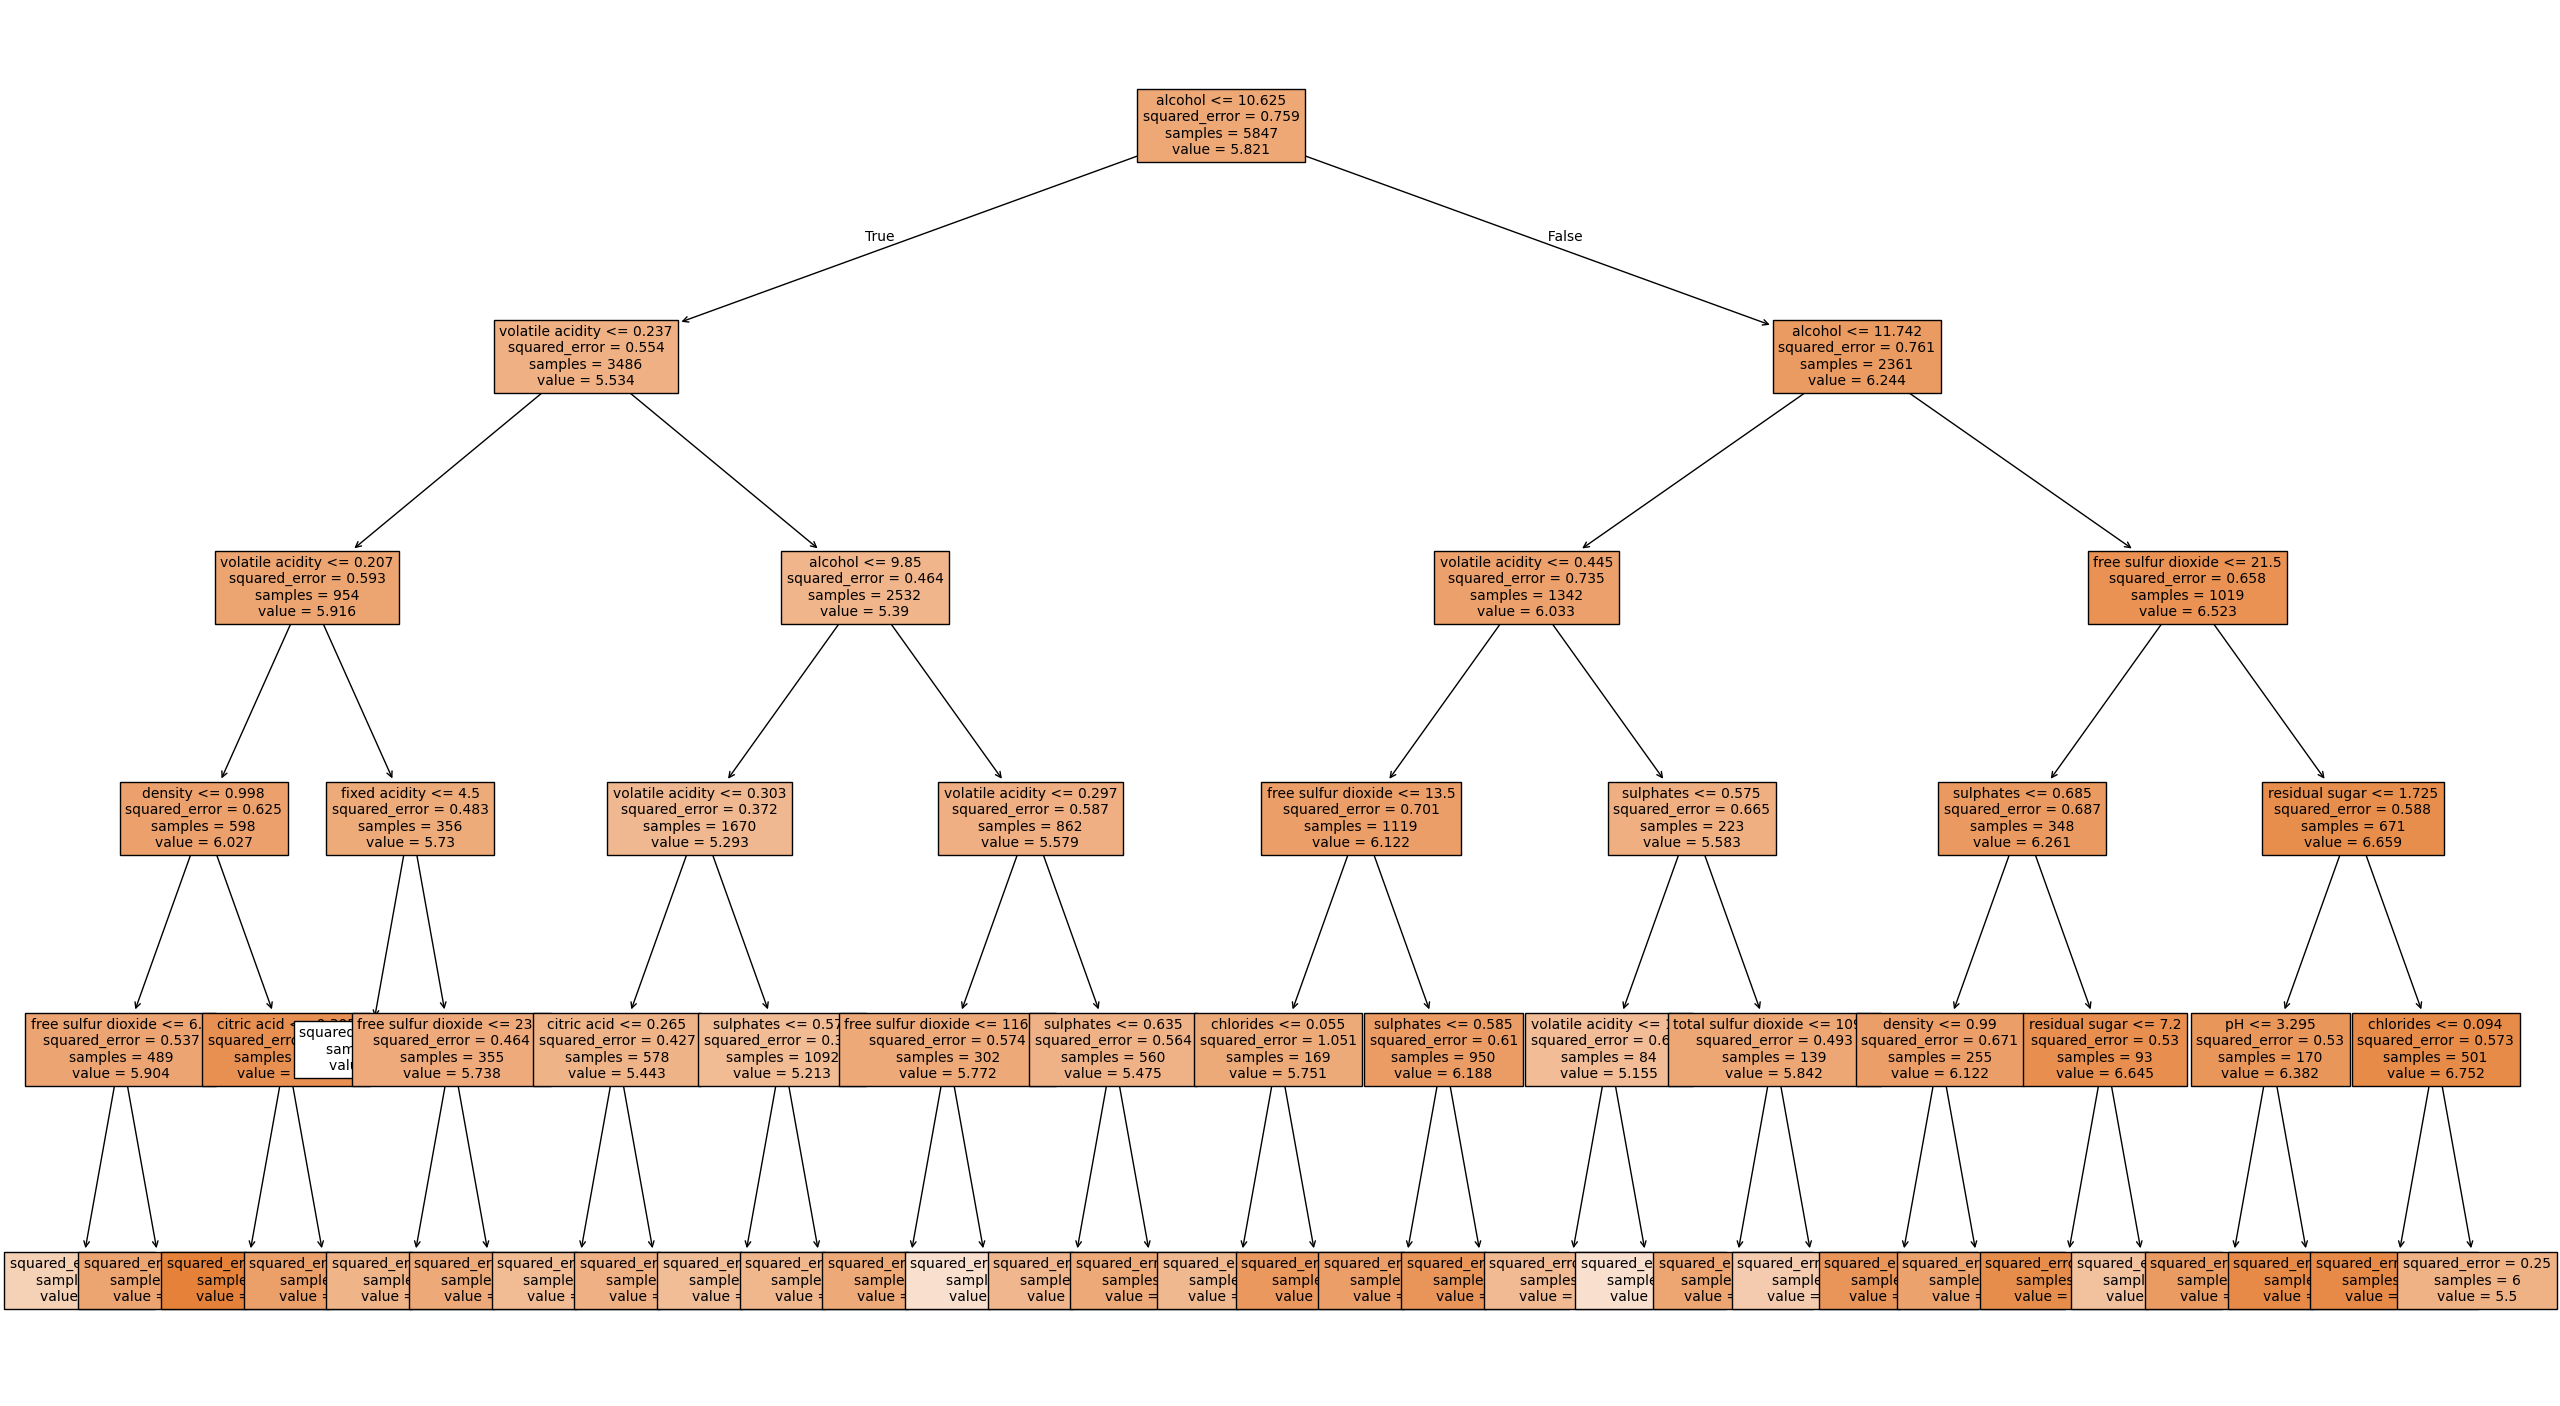

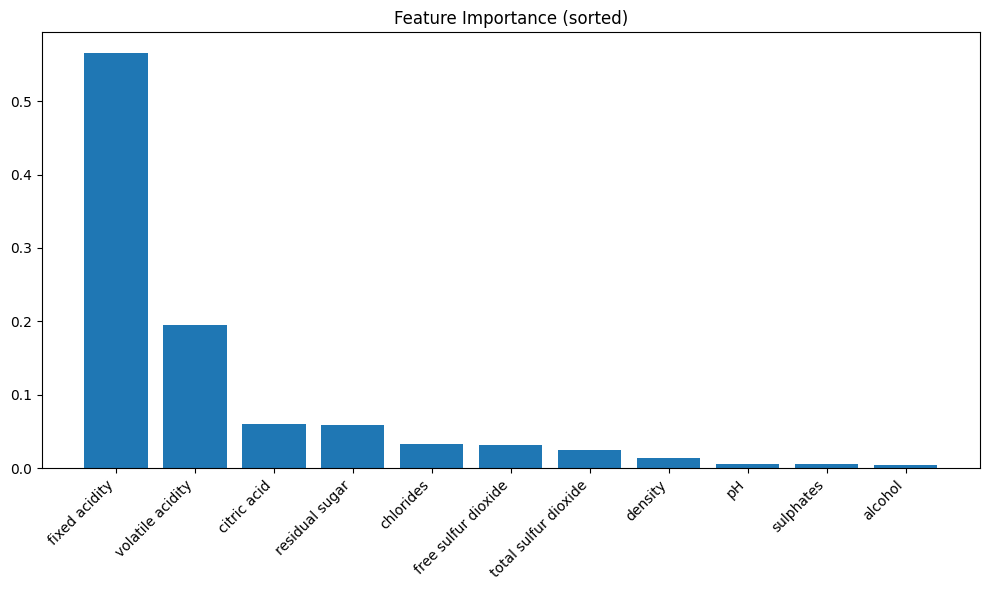

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- density <= 1.00
|   |   |   |   |--- free sulfur dioxide <= 6.50
|   |   |   |   |   |--- value: [4.50]
|   |   |   |   |--- free sulfur dioxide >  6.50
|   |   |   |   |   |--- value: [5.93]
|   |   |   |--- density >  1.00
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [7.07]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.07]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- fixed acidity <= 4.50
|   |   |   |   |--- value: [3.00]
|   |   |   |--- fixed acidity >  4.50
|   |   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |   |--- value: [5.44]
|   |   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |   |--- value: [5.80]
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |--- citric acid <= 0.27
|   |   |   |   |   |--- valu

In [ ]:
model = DecisionTreeRegressor(random_state=0, max_depth=5)

param_grid = {
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

grid.fit(x_train_full, y_train_full)
print(x_train_full)

print("Best parameters:", grid.best_params_)
print("Best CV MAE:", -grid.best_score_)

f_names = df2.columns.drop(["type", "quality"])
print(f_names)

best_tree = grid.best_estimator_
best_tree.fit(x_train_full, y_train_full)

plt.figure(figsize=(32, 18))
plot_tree(best_tree, feature_names=f_names, filled=True, fontsize=10)
plt.show()

importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), f_names, rotation=45, ha='right')
plt.title("Feature Importance (sorted)")
plt.tight_layout()
plt.show()


rules = export_text(best_tree, feature_names=f_names)
print(rules)